In [28]:
# Import the python library with the post-processing functions:
import sys
import importlib
import matplotlib.pyplot as plt
sys.path.insert(0, '../source')

import data_handling_functions
import post_processing_functions
importlib.reload(data_handling_functions)
importlib.reload(post_processing_functions)

from data_handling_functions import CaseParameters, load_case_properties, read_simulation_data
from post_processing_functions import getAvg_p_rgh, getAvg_T

In [18]:
# Path to the example simulation case:
case_path = "Resources/Catalyst_P-0.15_n-7_nl-2_Re-20/"

# Config file name (same as default)
# config_file_name= 'caseConfig.sh'

case_params = load_case_properties(case_path)

In [19]:
print(case_params)

CaseParameters (
  fluid_rho   = 1.19 [kg/m3]
  solid_rho   = 7800 [kg/m3]
  fluid_cp    = 1004.9 [J/(Kg*K)]
  solid_cp    = 510 [J/(Kg*K)]
  fluid_Pr    = 0.7 [-]
  fluid_k     = 0.021534 [W/(m*K)]
  solid_k     = 18 [W/(m*K)]
  fluid_mu    = 1.5e-05 [Pa*s]
  R           = 0.01 [m]
  Rchannels   = 0.0014639 [m]
  Rep         = 20 [-]
  wallTemp    = 300 [K]
  inletTemp   = 500 [K]
)


In [20]:
datafilename = read_simulation_data(case_path, mode='all')


Time required for reading the fluidmesh =  5.831324338912964
Time required for reading the solidmesh =  11.596812725067139
Timesteps momentum simulation:  ['0', '0.100014', '0.199939', '0.299984', '0.400021', '0.500053']
Timesteps thermal simulation:  ['0', '3.000025', '6.0000491', '8.9999479', '11.99997246', '14.9999970125']


In [44]:
import time
import joblib
time1 = time.time()
data = joblib.load(datafilename)

time2 = time.time()
print("Time saving data to joblib = ", time2-time1)



Time saving data to joblib =  23.369480848312378


In [21]:
import joblib
data = joblib.load("Resources/Catalyst_P-0.15_n-7_nl-2_Re-20/Case_P0.15_Re20.0_DATA.joblib")



0.00749996657205
5
['0.100014', '0.199939', '0.299984', '0.400021', '0.500053']
0
0.180096
1
0.180084
2
0.180077
3
0.180075
4
0.180074


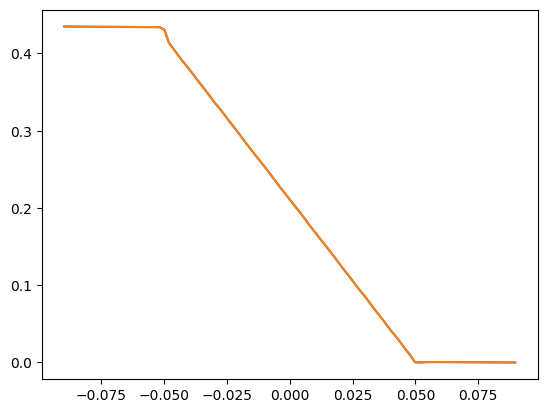

In [23]:
z_dots, avg_p = getAvg_p_rgh( data, 100 )

plt.plot(z_dots, avg_p[0])
plt.plot(z_dots, avg_p[4])
plt.show()

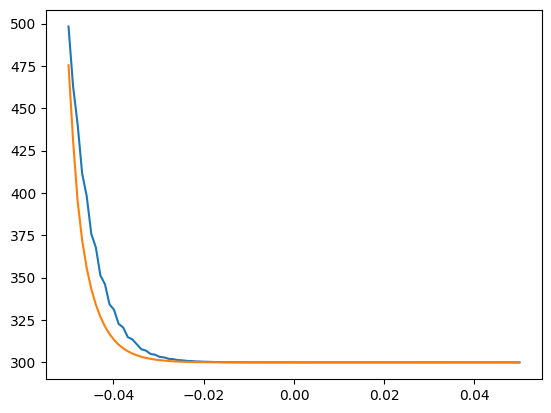

In [30]:
z_dots, avg_T_fluid, avg_T_solid = getAvg_T( data, 100 )

plt.plot(z_dots, avg_T_fluid[4])
plt.plot(z_dots, avg_T_solid[4])
plt.show()

In [ ]:
import Ofpp
Tfluid = data["VelocityField"]
print(len(Tfluid))
print(len(Tfluid[0]))
print(len(Tfluid[2]))
print(type(Tfluid[2][10]), Tfluid[2][10].shape)

fluidmesh = data["FluidMesh"]
len(fluidmesh.cell_centres)

5
132485
132485
<class 'numpy.ndarray'> (3,)


132485

In [ ]:
lista = []
lista.append("str1")
lista.append("str2")
lista.append("str3")

print(lista)
print(type(lista))

['str1', 'str2', 'str3']
<class 'list'>
